# Udemy courses EDA Analysis

## Importing Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Uploading Dataset

In [4]:
df=pd.read_csv(r"C:\Python\udemy_courses_dataset.csv")

In [5]:
df.head(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


## Understanding data

In [6]:
df.shape

(3678, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [9]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [15]:
df.duplicated().sum()

6

In [20]:
df=df.drop_duplicates()

In [21]:
df.duplicated().sum()

0

In [17]:
df.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

## Columns

In [22]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [23]:
df.columns = ['id', 'title', 'url', 'paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'duration', 'timestamp', 'subject']

In [24]:
df.columns

Index(['id', 'title', 'url', 'paid', 'price', 'num_subscribers', 'num_reviews',
       'num_lectures', 'level', 'duration', 'timestamp', 'subject'],
      dtype='object')

In [27]:
df.price.unique()

array([200,  75,  45,  95, 150,  65, 195,  30,  20,  50, 175, 140, 115,
       190, 125,  60, 145, 105, 155, 185, 180, 120,  25, 160,  40,   0,
       100,  90,  35,  80,  70,  55, 165, 130,  85, 170, 110, 135],
      dtype=int64)

In [26]:
df.paid.unique()

array([ True, False])

In [28]:
df.level.unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

In [29]:
df.subject.unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

## Adding columns

In [60]:
df['price_category'] = pd.cut(df['price'], bins=[0,50,150,float('inf')], labels=['low','medium','high'], right=False)

In [61]:
df['earn'] = df['price'] * df['num_subscribers']

In [64]:
df['timestamp'] = df['timestamp'].str.replace('T', ' ').str.replace('Z', '')

In [66]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [67]:
df.columns

Index(['id', 'title', 'url', 'paid', 'price', 'num_subscribers', 'num_reviews',
       'num_lectures', 'level', 'duration', 'timestamp', 'subject', 'earn',
       'price_category'],
      dtype='object')

In [68]:
df=df.reindex(columns = ['id', 'title', 'url', 'paid', 'price','price_category',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'duration', 'timestamp', 'subject','earn'])

In [100]:
df.head(5)

,id,title,url,paid,price,price_category,num_subscribers,num_reviews,num_lectures,level,duration,timestamp,subject,earn
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,high,2147,23,51,All Levels,1.5,2017-01-18 20:58:58,Business Finance,429400
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,medium,2792,923,274,All Levels,39.0,2017-03-09 16:34:20,Business Finance,209400
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,low,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30,Business Finance,97830
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,medium,2451,11,36,All Levels,3.0,2017-05-30 20:07:24,Business Finance,232845
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,high,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18,Business Finance,255200


## Detecting Outliers

Text(0.5, 1.0, 'Boxplot for price')

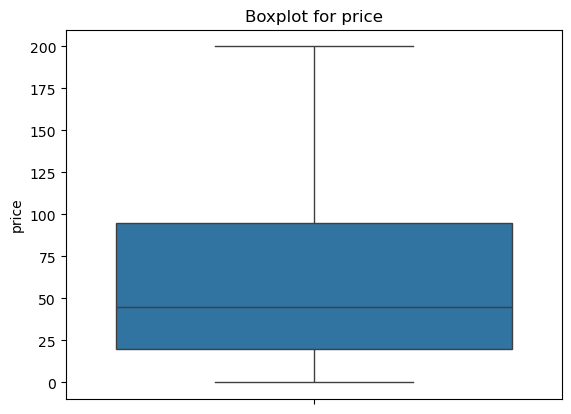

In [31]:
sns.boxplot(df['price']).set_title('Boxplot for price')

Text(0.5, 1.0, 'Boxplot for number of subscribers')

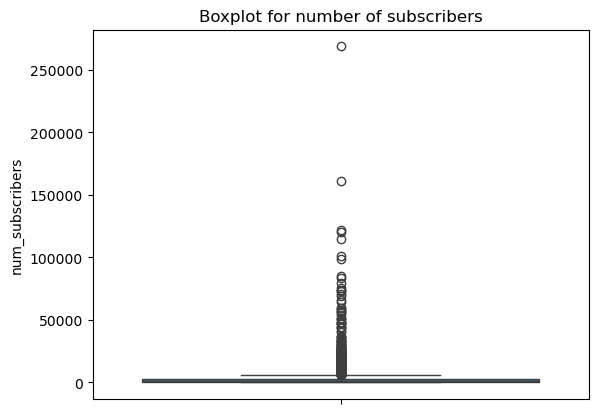

In [33]:
sns.boxplot(df['num_subscribers']).set_title('Boxplot for number of subscribers')

Text(0.5, 1.0, 'Boxplot for number of reviews')

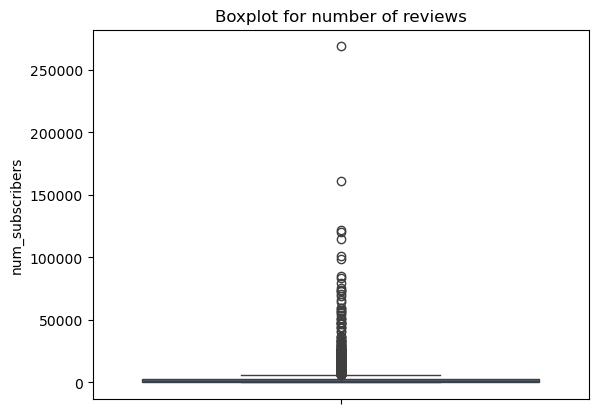

In [34]:
sns.boxplot(df['num_subscribers']).set_title('Boxplot for number of reviews')

Text(0.5, 1.0, 'Boxplot for number of lectures')

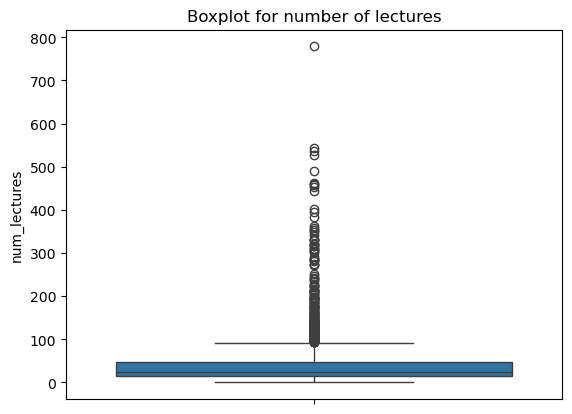

In [35]:
sns.boxplot(df['num_lectures']).set_title('Boxplot for number of lectures')

When we detect the outliers in the datsets we try to get rid of them as they represent the abnormal distance 
from other values however these outliers are important and will affect the important plots and graphs that 
will be created during data visualization.




## Data Visualization

Text(0.5, 1.0, 'Displot for Price distribution')

<Figure size 1000x800 with 0 Axes>

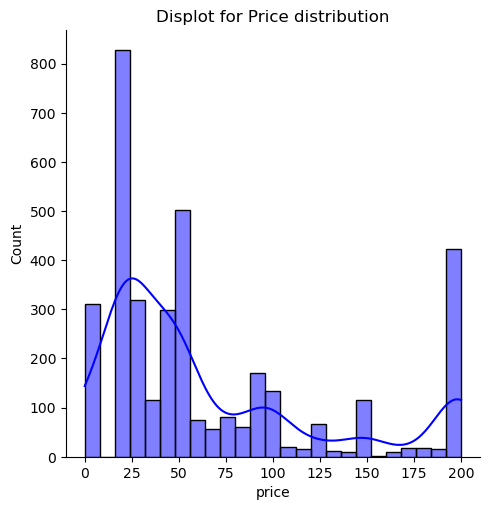

In [72]:
plt.figure(figsize=(10,8))
sns.displot(df['price'], bins=25, kde=True, color='Blue')
plt.title('Displot for Price distribution')

Text(0.5, 1.0, 'Price v/s number of subscribers')

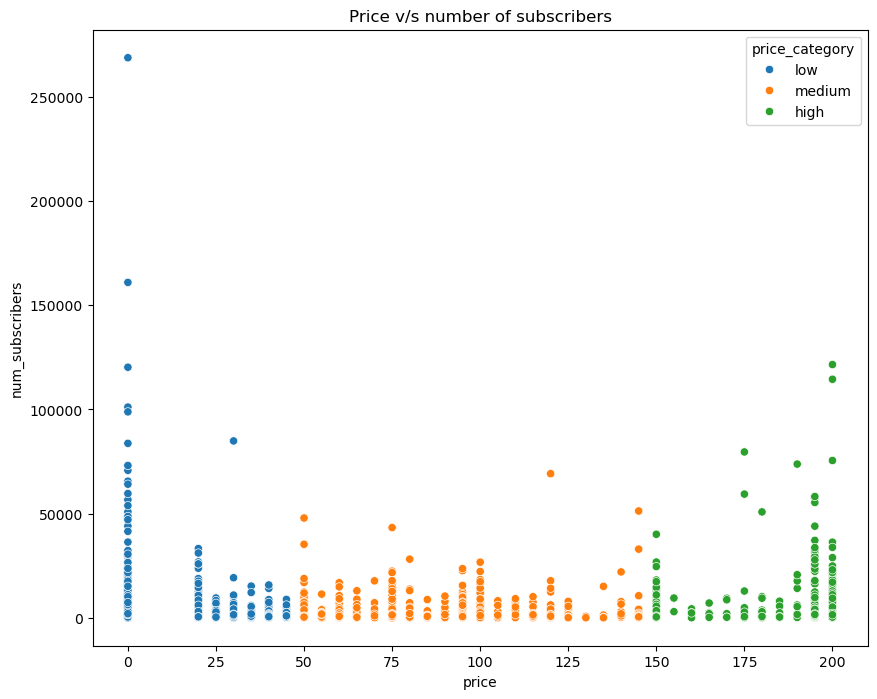

In [73]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='price', y='num_subscribers' ,data=df, hue='price_category', color= 'purple')
plt.title('Price v/s number of subscribers')

From this plot swe can observe the distribution of udemy course.
Mostly low priced courses particularly free ones attract significantly most subscribers, this conclude that afforable or free courses has strong influence on student enrollment.
High priced courses have fewer subscribers, some are exceptions.
As the price increases, demand for the courses in terms of subscriber numbers generally decreases. However, some high-priced courses in certain categories still manage to attract a considerable number of subscribers.

Text(0.5, 1.0, 'No. of courses by levels')

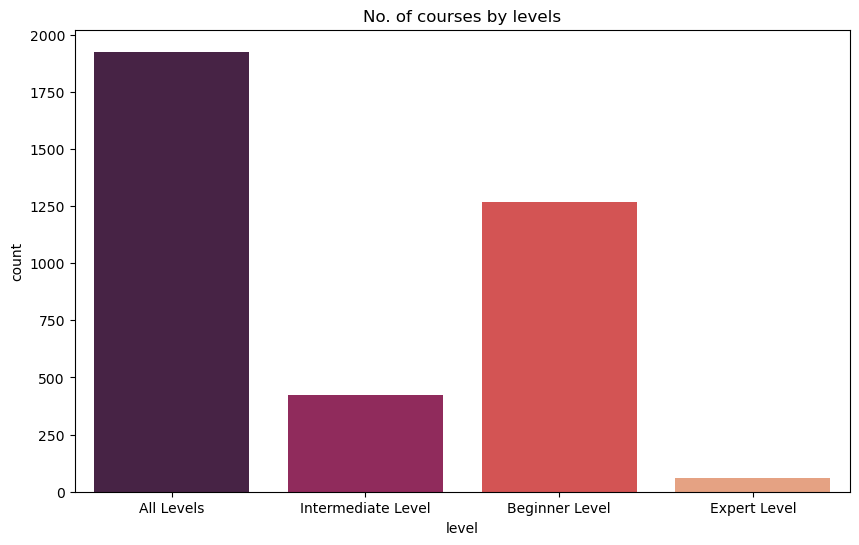

In [137]:
plt.figure(figsize=(10,6))
sns.countplot(x='level', data=df, color='brown', palette='rocket')
plt.title('No. of courses by levels')

The graph shows the distribution of courses by level. The majority of courses are classified under "All Levels", followed by Beginner Level with courses. There are very few Expert Level courses, indicating that most courses are designed to cater to a broader audience.

Text(0.5, 1.0, 'No. of courses by subject')

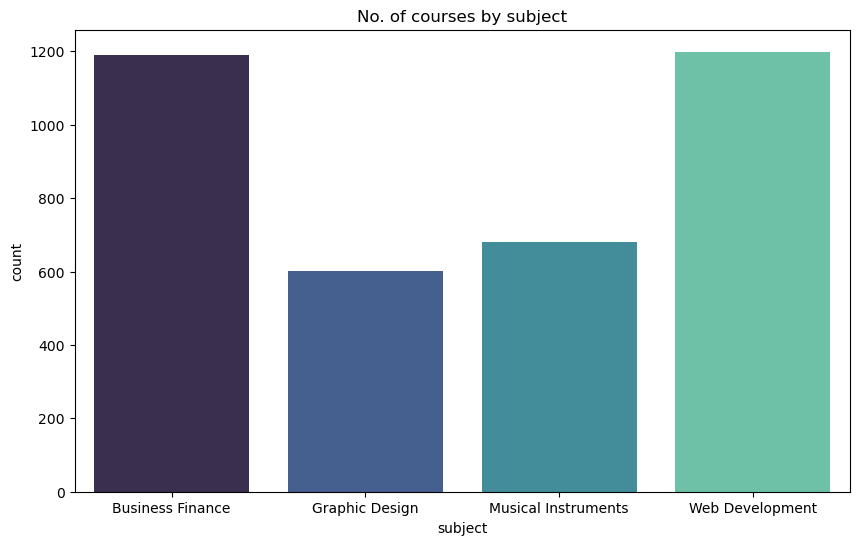

In [138]:
plt.figure(figsize=(10,6))
sns.countplot(x='subject', data=df, color='brown', palette='mako')
plt.title('No. of courses by subject')

The graph shows the distribution of subjects, Buisness finanace and web development are the two categories with highest number of courses.
The web development category significantly has highest number of courses among all.

Text(0.5, 1.0, 'Content')

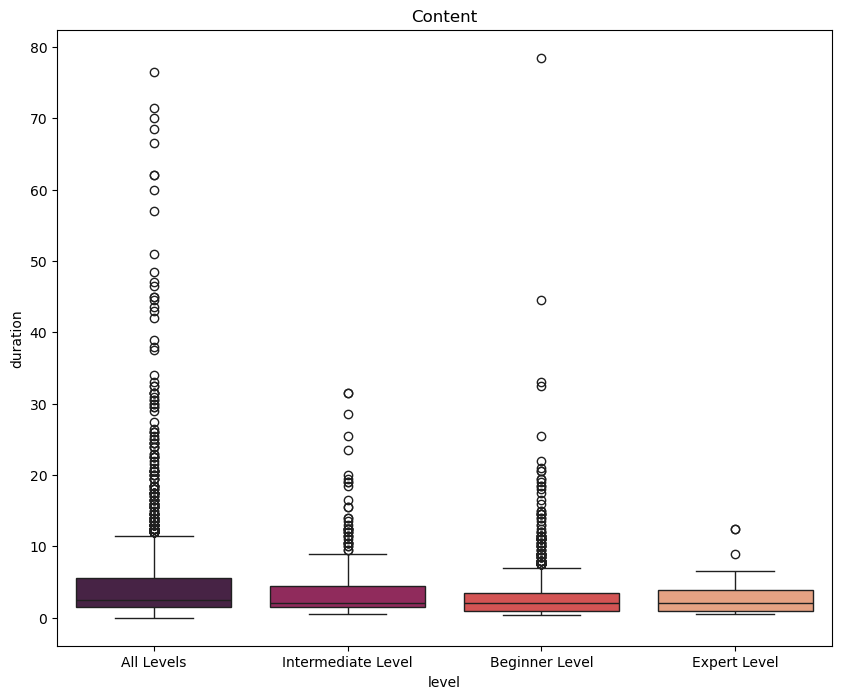

In [139]:
plt.figure(figsize=(10,8))
sns.boxplot(x='level', y='duration' ,data=df, palette='rocket')
plt.title('Content')

This barplot shows that all level, intermediate level and beginner courses have a similar median duration around 10 hours, with some outliers reaching up to 70-80 hours.
While expert Level courses are shorter on average, with a median around 5-7 hours, and fewer outliers reaching 30 hours.

<Axes: xlabel='num_subscribers', ylabel='title'>

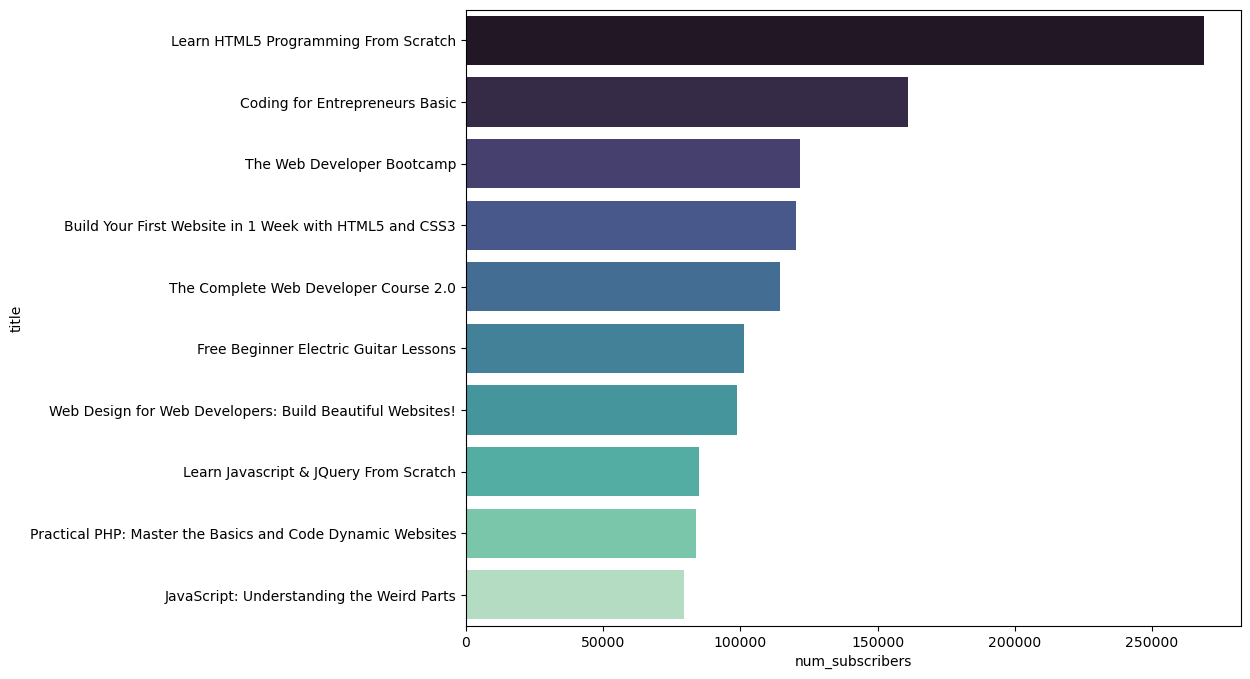

In [116]:
top10_courses = df.sort_values(by='num_subscribers', ascending=False)[:10]
plt.figure(figsize=(10,8))
sns.barplot(x='num_subscribers', y='title' , data=top10_courses, palette='mako')

The barchart represents the top 10 udemy courses :
 The learn HTML5 from scratch is the most popular course with the subscribers over 250000, this highlight the demand for learning foundation of web development.
 While others topics are also somewhere related to web development at different levels.

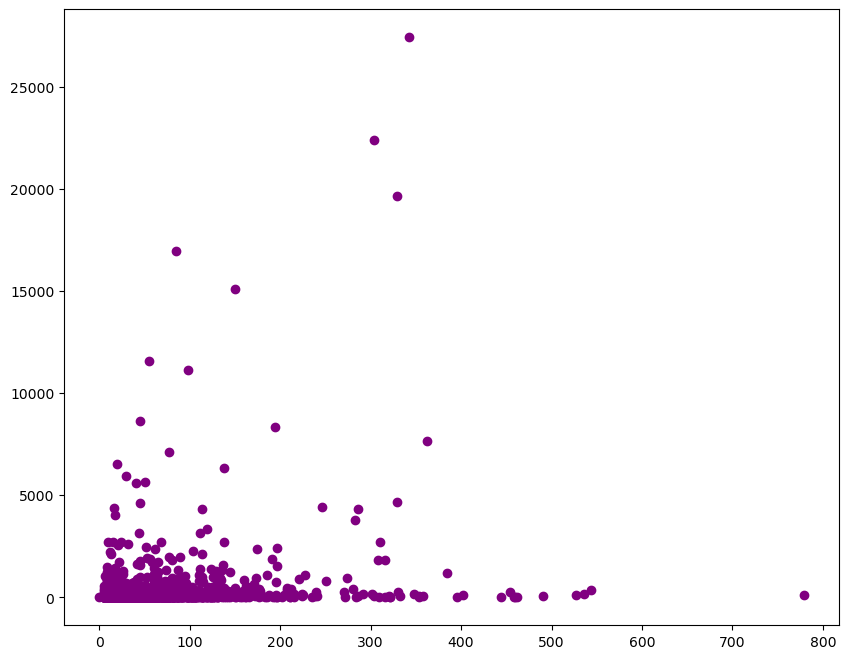

In [130]:
plt.figure(figsize=(10,8))
plt.scatter(df['num_lectures'],df['num_reviews'] , color='purple')

This graph shows the relationship between the number of lectures and number of reviews. Courses with fewer lectures, particularly between 0 and 100, tend to have more reviews. However, as the number of lectures increases, there isn't a significant rise in the number of reviews. Courses with over 300 lectures tend to receive fewer reviews, indicating that more content doesn't necessarily lead to more engagement in terms of reviews.

<Axes: >

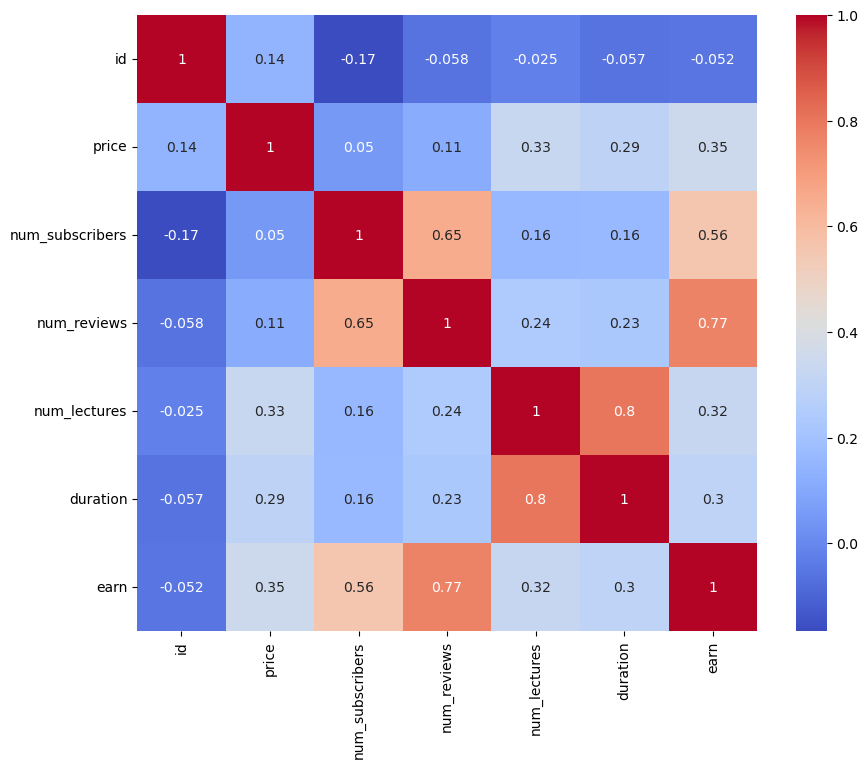

In [136]:
correlation_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = correlation_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

This heatmap shows correlations between variables, where the intensity of the color indicates the strength of the relationship.
Revenue has a strong positive correlation with number of reviews (0.77), indicating that courses with more reviews tend to more earning.
Number of lectures and duration have weaker positive correlations with revenue (0.32 and 0.30).There is a strong correlation between number of reviews and subscribers (0.65), indicating that courses with more subscribers also tend to receive more reviews.:

## Conclusion:

### key insight
low priced courses and free courses attracts the most subscribers
,  technical courses have most enrollments
,  all-level courses have longer content than other


### Improvement
Optimize pricing by increasing courses in the low price range., 
Leverage free courses to upsell to paid courses, .
Enhance course discovery with personalized recommendations and better visibilics.